In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


df = pd.read_csv('/content/drive/MyDrive/classification task/data.csv')

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.isnull().value_counts()

date   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view   condition  sqft_above  sqft_basement  yr_built  yr_renovated  street  city   statezip  country
False  False  False     False      False        False     False   False       False  False      False       False          False     False         False   False  False     False      4600
dtype: int64

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
df.shape

(4600, 18)

In [ ]:
header_row = df.columns.tolist()
print(header_row)

['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country']


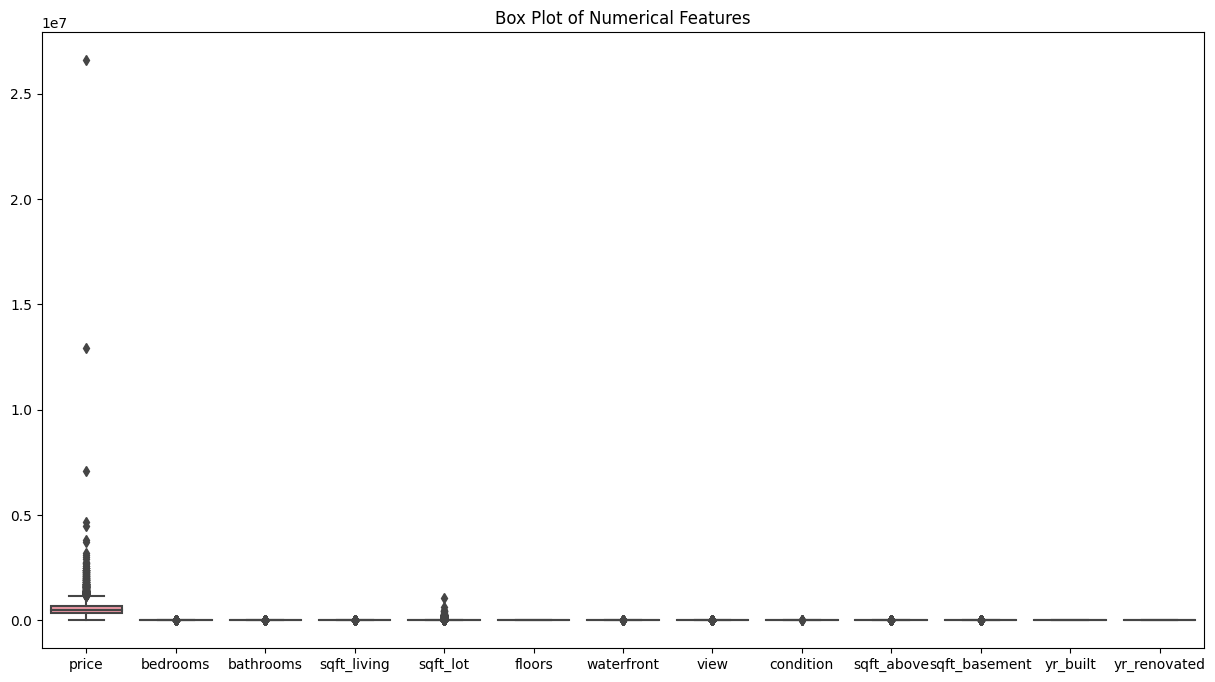

In [ ]:
import seaborn as sns


# Visualize outliers using box plots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title("Box Plot of Numerical Features")
plt.show()


<ipython-input-8-64632b6be036>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


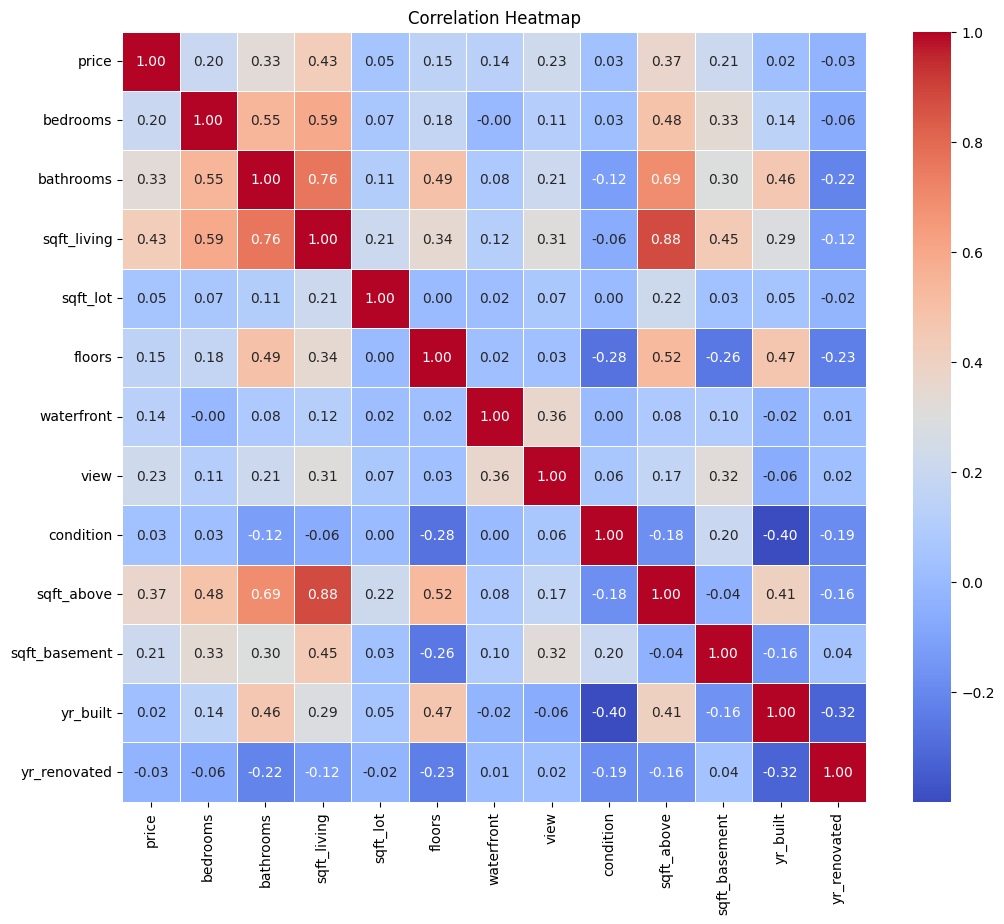

In [ ]:
# Visualize correlations between features
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Assuming 'Square_Footage' and 'Location' are the correct column names
X = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]
y = df['price']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Convert 'price' to a numeric type (assuming it's a date column)
y_train = pd.to_numeric(y_train, errors='coerce')


In [ ]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
model.score(X_test, y_test)

1.0

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

In [ ]:
# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print or use the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 9.369458889803315e-20
R-squared (R2): 1.0


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
lr=DecisionTreeRegressor(random_state=1)

In [ ]:
lr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
pred=lr.predict(X_test)

In [ ]:
lr.score(X_train,y_train)

1.0

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
mse

9.369458889803315e-20

In [ ]:
r2

1.0

In [ ]:
pred=pred.tolist()

In [ ]:
pred=pd.DataFrame(pred)

In [ ]:
pd.to_numeric(pred)

In [ ]:
x=pred[:]

In [ ]:
x=[x]

In [ ]:
a=x[0]

In [ ]:
b=pd.DataFrame(a)

**Predicted Values**

In [ ]:
b

,0
0,5.440000e+05
1,0.000000e+00
2,1.695000e+06
3,3.650000e+05
4,2.750000e+05
...,...
915,7.500000e+05
916,2.300000e+05
917,4.668000e+06
918,6.875000e+05


**Actual Values**

In [ ]:
pd.DataFrame(y_test)

,price
3683,544000.0
4411,0.0
2584,1712500.0
69,365000.0
1844,275000.0
...,...
1612,750000.0
1068,230000.0
4350,26590000.0
3027,687000.0
